# Naive Bayes

<br/>

#### Description of model:
*   Naive Bayes is a classification technique based on the Bayes theorem.

*   Gaussian Naive Bayes is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed. 

* Naive Asssumtion: features are independent of each other.

<br/>

#### Why it was chosen for analysis:
* Simple, Fast in processing, and effective in predicting the class of test dataset.
* Does well with few samples for training when compared to other models.
* Easy to obtain the estimated probability for a prediction.

<br/>

#### Accuracy 
* before hyperparameter tuning => 63.509 %
* after hyperparameter tuning => 75.396 %

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/FDM MINI PROJECT/Feature Engineering

/content/drive/MyDrive/FDM MINI PROJECT/Feature Engineering


In [4]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline

In [7]:
url = 'https://drive.google.com/file/d/1jIQw8krbUHOarMutqLjJZ-ZBZyyFZ6yP/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [8]:
df = pd.read_csv(url)
df.sample(5)

lead_time  is_same_room  previous_cancellations  \
10945   0.491256             1                       0   
51735   0.305246             1                       0   
15533   0.178060             1                       0   
64279   0.007949             1                       0   
41041   0.000000             0                       0   

       total_of_special_requests  booking_changes  is_cancelled  
10945                          0                0             1  
51735                          0                0             0  
15533                          0                0             1  
64279                          0                0             0  
41041                          1                0             0

In [9]:
X = df.drop('is_cancelled', axis='columns')
y = df.is_cancelled

### **Split training and testing set**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### **Create and train model**

In [11]:
model = GaussianNB()

In [12]:
model.fit(X_train, y_train)

GaussianNB()

### **Model's Acccuracy Score**

In [13]:
print('Training set score: {:.3f} %'.format(model.score(X_test, y_test) * 100))

Training set score: 63.509 %


### **Compare the train-set and test-set accuracy**

In [14]:
print('Accuracy score on train dataset: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy score on test dataset: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy score on train dataset: 0.633
Accuracy score on test dataset: 0.635


### **Prediction on new samples**

In [15]:
model.predict([[0.5276864, 1, 0, 1, 1]])

array([1])

* The training-set accuracy score is 60.648 % while the test-set accuracy to be 61.141 %. These two values are quite comparable. So, there is no question of overfitting.

### **Confusion Matrix**

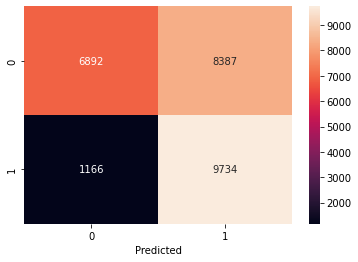

In [16]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

### **Classification Report**

In [17]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59     46228
           1       0.54      0.89      0.67     33102

    accuracy                           0.63     79330
   macro avg       0.69      0.67      0.63     79330
weighted avg       0.72      0.63      0.62     79330



### **k-Fold Cross Validation**

In [18]:
# Applying 5-Fold Cross Validation
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(cv_scores))
print(model, 'mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

Cross-validation scores:[0.60652808 0.60366886 0.65390405 0.65343368 0.60903104]
GaussianNB() mean accuracy:  62.531 % std:  0.054 %


### **Hyper Parameter Tuning**

In [19]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [20]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [21]:
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_nb = GridSearchCV(estimator=model, 
                     param_grid=params_nb, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

data_transformed = PowerTransformer().fit_transform(X_test)

gs_nb.fit(data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [22]:
gs_nb.cv_results_

{'mean_fit_time': array([0.00503639, 0.00560295, 0.00489987, 0.00498575, 0.00504433,
        0.00480315, 0.00490438, 0.00536838, 0.00502748, 0.00530232,
        0.00537349, 0.00516923, 0.00515383, 0.00526856, 0.00507884,
        0.00526733, 0.00574581, 0.00552859, 0.00555329, 0.00538573,
        0.00525773, 0.00530508, 0.00531133, 0.00705075, 0.0082513 ,
        0.0095452 , 0.00940337, 0.0106068 , 0.00948726, 0.00997666,
        0.00904379, 0.00842714, 0.0131763 , 0.01566159, 0.00865685,
        0.01350474, 0.01412331, 0.00793502, 0.00780379, 0.00730565,
        0.00973142, 0.01059844, 0.01048911, 0.00799883, 0.00940914,
        0.00995801, 0.00720399, 0.01001646, 0.00803304, 0.00708917,
        0.01002309, 0.00705969, 0.00870614, 0.01196706, 0.01167135,
        0.00897551, 0.01268075, 0.00626958, 0.0052237 , 0.0055783 ,
        0.00545533, 0.00503844, 0.00485384, 0.00526989, 0.00506031,
        0.0050995 , 0.00528019, 0.00528763, 0.0052096 , 0.00532079,
        0.00511648, 0.00513023,

In [27]:
print(gs_nb.best_params_)
print(gs_nb.best_score_)

{'var_smoothing': 0.15199110829529336}
0.754255937331953


In [28]:
df = pd.DataFrame(gs_nb.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.005036      0.000176         0.001350        0.000055   
1        0.005603      0.001011         0.001695        0.001216   
2        0.004900      0.000331         0.001215        0.000038   
3        0.004986      0.000232         0.001259        0.000086   
4        0.005044      0.000420         0.001297        0.000121   
..            ...           ...              ...             ...   
95       0.005195      0.000431         0.001337        0.000132   
96       0.005876      0.000880         0.001470        0.000182   
97       0.005432      0.000514         0.001405        0.000106   
98       0.005099      0.000117         0.001341        0.000032   
99       0.005111      0.000130         0.001356        0.000039   

   param_var_smoothing                                     params  \
0                  1.0                     {'var_smoothing': 1.0}   
1             0.811131      {'var_smoothing': 0.8111308307896871}   
2             0.657933       {'var_smoothing': 0.657933224657568}   
3              0.53367       {'var_smoothing': 0.533669923120631}   
4             0.432876     {'var_smoothing': 0.43287612810830584}   
..                 ...                                        ...   
95                 0.0   {'var_smoothing': 2.310129700083158e-09}   
96                 0.0   {'var_smoothing': 1.873817422860387e-09}   
97                 0.0   {'var_smoothing': 1.519911082952933e-09}   
98                 0.0  {'var_smoothing': 1.2328467394420635e-09}   
99                 0.0                   {'var_smoothing': 1e-09}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.758785           0.749045           0.754775   
1            0.758212           0.749618           0.758212   
2            0.759358           0.749427           0.760886   
3            0.758212           0.748854           0.757639   
4            0.757830           0.747899           0.756875   
..                ...                ...                ...   
95           0.759167           0.749236           0.758976   
96           0.759167           0.749236           0.758976   
97           0.759167           0.749236           0.758976   
98           0.759167           0.749236           0.758976   
99           0.759167           0.749236           0.758976   

    split3_test_score  ...  split8_test_score  split9_test_score  \
0            0.745607  ...           0.753820           0.750525   
1            0.744461  ...           0.753247           0.751480   
2            0.747899  ...           0.756875           0.756638   
3            0.748090  ...           0.753056           0.754155   
4            0.747326  ...           0.750573           0.756256   
..                ...  ...                ...                ...   
95           0.749618  ...           0.753247           0.757020   
96           0.749618  ...           0.753247           0.757020   
97           0.749618  ...           0.753247           0.757020   
98           0.749618  ...           0.753247           0.757020   
99           0.749618  ...           0.753247           0.757020   

    split10_test_score  split11_test_score  split12_test_score  \
0             0.757448            0.760886            0.754584   
1             0.753629            0.760122            0.754584   
2             0.756494            0.761077            0.754011   
3             0.755157            0.764324            0.756684   
4             0.756684            0.763178            0.752292   
..                 ...                 ...                 ...   
95            0.756112            0.766043            0.756303   
96            0.756112            0.766043            0.756303   
97            0.756112            0.766043            0.756303   
98            0.756112            0.766043            0.756303   
99            0.756112            0.766043            0.75

In [29]:
results_nb = pd.DataFrame(gs_nb.cv_results_['params'])
results_nb['test_score'] = gs_nb.cv_results_['mean_test_score']

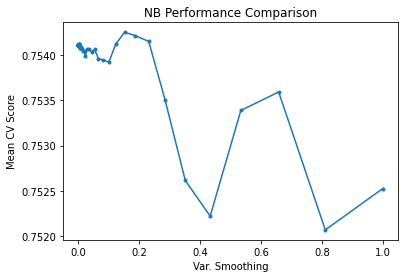

In [30]:
plt.plot(results_nb['var_smoothing'], results_nb['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [32]:
predict_test = gs_nb.predict(data_transformed)
accuracy_test = accuracy_score(y_test,predict_test)
print('Accuracy score on test dataset: {:.3f} %'.format(accuracy_test * 100))

Accuracy score on test dataset: 75.396 %


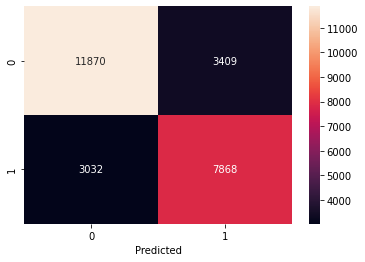

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     15279
           1       0.70      0.72      0.71     10900

    accuracy                           0.75     26179
   macro avg       0.75      0.75      0.75     26179
weighted avg       0.76      0.75      0.75     26179



In [35]:
sns.heatmap(confusion_matrix(y_test, predict_test), annot = True, fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()
print(classification_report(y_test, predict_test))

In [34]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     15279
           1       0.70      0.72      0.71     10900

    accuracy                           0.75     26179
   macro avg       0.75      0.75      0.75     26179
weighted avg       0.76      0.75      0.75     26179



### **Save the model**

In [ ]:
pickle.dump(gs_nb, open('naive_mdl.pkl','wb'))

In [ ]:
model = pickle.load(open('naive_mdl.pkl','rb'))
print(model.predict([[0.225614,1,2,2,0]]))

[1]
